In [4]:
pip install numpy pandas matplotlib statsmodels


**IMPORT** **LABARIES**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [6]:
#LOAD THE DATASET
df = pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True) # Wrap 'AirPassengers.csv' in quotes to specify it as a string literal.

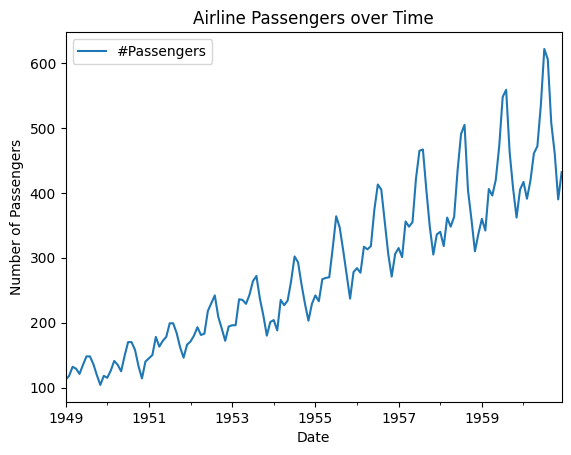

In [7]:
# Visualize the data
df.plot()
plt.title('Airline Passengers over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

**CHECK** **STATIONARY**

In [8]:
# ADF Test to check if the series is stationary
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Perform the test on the time series
adf_test(df)

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The series is not stationary.


**CHECK** **DIFFRENCING**

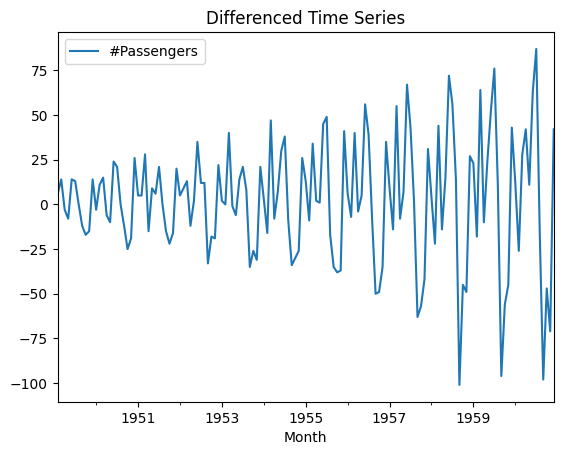

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
The series is not stationary.


In [9]:
df_diff = df.diff().dropna()
df_diff.plot()
plt.title('Differenced Time Series')
plt.show()

# Re-test for stationarity
adf_test(df_diff)


PLOT **ACF** AND **PACF**

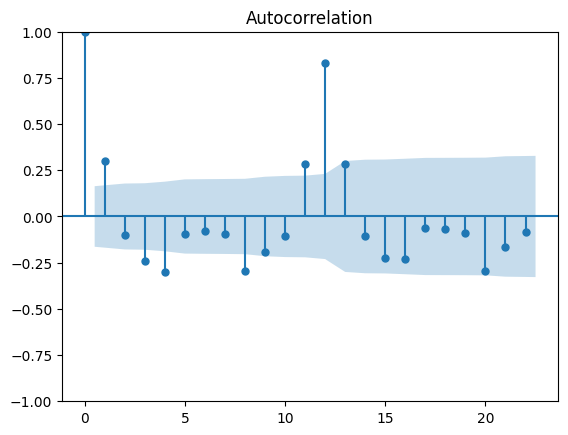

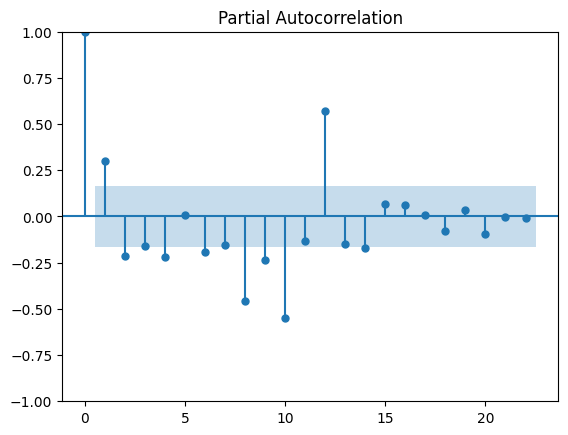

In [10]:
# Plot ACF and PACF
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


FIT **ARIMA** MODEL

In [11]:
# Fit ARIMA model
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

# Model Summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 09 Apr 2025   AIC                           1394.683
Time:                        22:11:56   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

**EVALUATE THE MODEL**


<ipython-input-12-e07b5fed8bc2>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted', color='red')


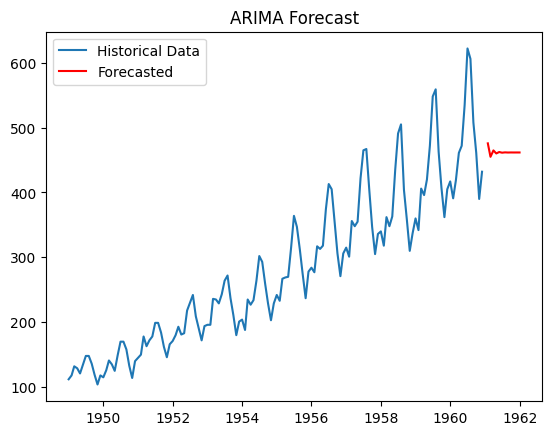

In [12]:
# Forecasting the next 12 time steps (e.g., next year)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.plot(df.index, df.values, label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

**SARIMA FOR SEASONALITY**

In [13]:
# Fit SARIMA model
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (p, d, q, s)
sarima_model = SARIMAX(df, order=(1, 1, 1), seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# SARIMA model summary
print(sarima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 09 Apr 2025   AIC                           1022.299
Time:                                    22:11:58   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

 Forecasting with SARIMA

<ipython-input-14-439538504d7f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')


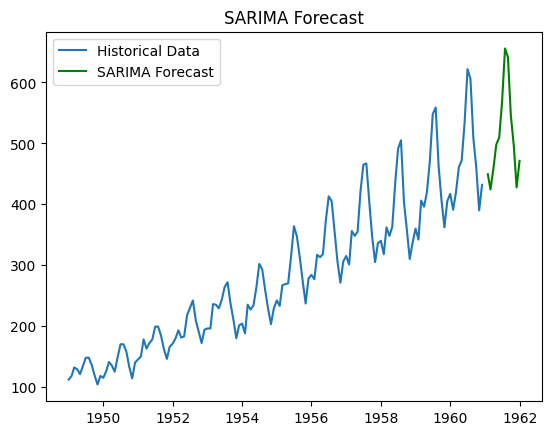

In [14]:
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Plot SARIMA Forecast
plt.plot(df.index, df.values, label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

COMPARE ARIMA VS SARIMA

In [15]:
from sklearn.metrics import mean_squared_error

# Assuming you have a holdout set for testing (or using the last part of the dataset for evaluation)
y_test = df[-forecast_steps:]
arima_mse = mean_squared_error(y_test, forecast)
sarima_mse = mean_squared_error(y_test, sarima_forecast)

print(f'ARIMA MSE: {arima_mse}')
print(f'SARIMA MSE: {sarima_mse}')

ARIMA MSE: 5819.7213833517735
SARIMA MSE: 1313.4412119860372
